==================== Logistic Regression ====================
              precision    recall  f1-score   support

         0.0       0.50      0.14      0.22        21
         1.0       0.55      0.41      0.47        54
         2.0       0.47      0.67      0.55        78
         3.0       0.57      0.37      0.45        83
         4.0       0.87      0.96      0.91       243

    accuracy                           0.71       479
   macro avg       0.59      0.51      0.52       479
weighted avg       0.70      0.71      0.69       479

Matriz de Confusión:
[[  3   6   5   2   5]
 [  2  22  25   3   2]
 [  1   9  52  13   3]
 [  0   1  26  31  25]
 [  0   2   2   5 234]]


==================== Decision Tree ====================
              precision    recall  f1-score   support

         0.0       0.23      0.24      0.23        21
         1.0       0.36      0.50      0.42        54
         2.0       0.38      0.38      0.38        78
         3.0       0.37      0.41    

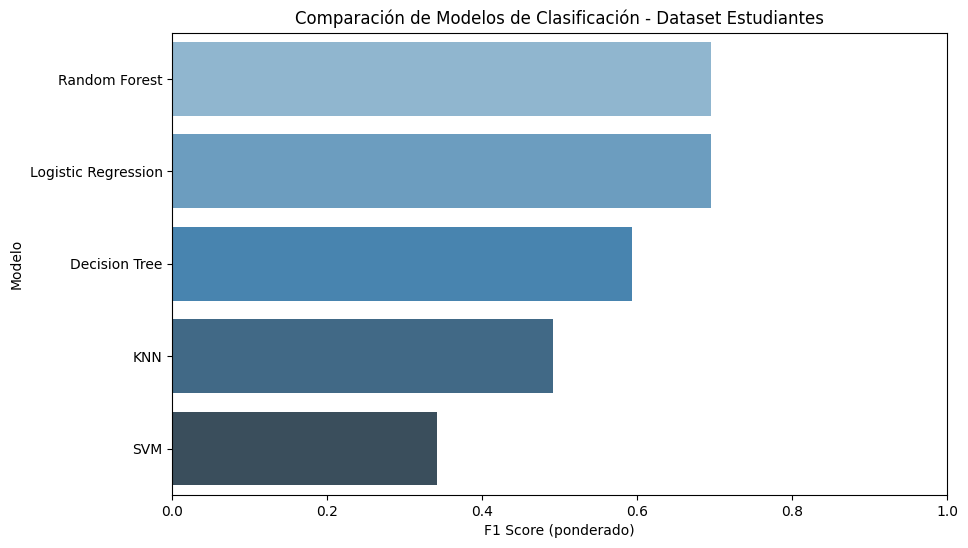

In [1]:
# ==============================================================================
# LIBRERÍAS
# ==============================================================================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# ==============================================================================
# CARGA DE DATOS
# ==============================================================================
file_path = r"C:\Users\Jaime Giraldo U\Modelo_Especializacion_Udea\MachineLearningOne\ExploringDatasets\Student_Performance\Student_performance_data _.csv"
df = pd.read_csv(file_path)

# ==============================================================================
# PREPROCESAMIENTO
# ==============================================================================
excluded_cols = ['StudentID', 'GPA']
target = 'GradeClass'

# Variables a escalar
scale_cols = ['StudyTimeWeekly', 'Absences']
features = [col for col in df.columns if col not in excluded_cols + [target]]

# Escalar
scaler = MinMaxScaler()
df[scale_cols] = scaler.fit_transform(df[scale_cols])

# División
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# ==============================================================================
# MODELOS A COMPARAR
# ==============================================================================
models = {
    'Logistic Regression': LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, class_weight='balanced'),
    'SVM': SVC(probability=True, random_state=42),
    'KNN': KNeighborsClassifier()
}

results = []

# ==============================================================================
# EVALUACIÓN
# ==============================================================================
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    report = classification_report(y_test, y_pred, output_dict=True)

    results.append({
        'Modelo': name,
        'Accuracy': acc,
        'F1 Score (weighted)': f1
    })

    print(f"==================== {name} ====================")
    print(classification_report(y_test, y_pred))
    print("Matriz de Confusión:")
    print(confusion_matrix(y_test, y_pred))
    print("\n")

# ==============================================================================
# RESULTADOS COMPARATIVOS
# ==============================================================================
results_df = pd.DataFrame(results).sort_values(by='F1 Score (weighted)', ascending=False)
print("==== COMPARATIVA FINAL ====")
print(results_df)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='F1 Score (weighted)', y='Modelo', data=results_df, palette='Blues_d')
plt.title("Comparación de Modelos de Clasificación - Dataset Estudiantes")
plt.xlim(0, 1)
plt.xlabel("F1 Score (ponderado)")
plt.ylabel("Modelo")
plt.show()
